## Final Project: House Prices Prediction
https://www.kaggle.com/c/house-prices-advanced-regression-techniques  

### Team MLAIRE: Chi Iong Ansjory, Prabhat Tripathi, Soodong Kim, Tina Agarwal

## Problem

The goal of this project is to predict sale price of residential homes in Ames, Iowa based on the given training and test data sets. There are 79 explanatory variables describing different aspects of residential homes with 1460 observations in both training and test data sets (this is different than previous class projects where train data is usually larger than test data set). 

The output variable (SalePrice) is quantitative (continuous) whereas the explanatory (LHS) variables are a combination of quantitative (continuous) and categorical variables. 

Considering the size and nature of the data set, and informed by our domain understanding, we beleive that *feature engineering* -- crafting data features optimized for machine learning -- is key for better modeling for this problem. Specifically, we plan to perform following:

- Univariate analysis of output and explanatory variables: weed out spurious or wrong values. Understand patterns and outliers for each variable. Allow for missing values (NaN) imputations.
- Transform categorical variables into numeric (using dummy variables?)
- Check if log transformation of output and explanatory variables helps better model performance
- Identify and remove unhelpful explanatory variables (using correlation matrix or using techniques such as LASSO)
- Identify and remove multicollinearity, if present
- Advance feature engineering techniques such as PCA?

We also have to watch out for overfitting considering there are a large number of input variables (compared to the training data size).

We plan to begin with (multiple) LinearRegression model (for speed) and if the accuracy is not satisfactory, we would try other models such as random forest and gradient-boosting tree. If needed, we may have to ensemble all these models for better overall accuracy. We will split test data into two random sets and use one as "dev" data during model buidling process.

## Data Loading

In [1]:
# Each plot will not open a new window. 
# required libraries
## pandas
## seaborn
## XGBoost -- allows for correlated features
%matplotlib inline

# Import relevant libraries.

# General libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.grid_search import GridSearchCV
from sklearn import metrics

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

# Libraries for files
import os

# Python fundamental libraries
import collections

# Disable warnings for more clear output
import warnings 
warnings.filterwarnings('ignore')


/usr/local/lib/python3.7/site-packages/sklearn/grid_search.py:14: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping, namedtuple, Sized
/usr/local/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/usr/local/lib/python3.7/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Import Data

In [2]:
# Load Data
from sklearn.cross_validation import train_test_split

# Please keep this relative path access to data.
dir_name = os.getcwd()
train_filename = os.path.join(dir_name, 'data/train.csv')
test_filename = os.path.join(dir_name, 'data/test.csv')

# Reading the data
train = pd.read_csv(train_filename)
test  = pd.read_csv(test_filename)
train_ = train.copy()
test_ = test.copy()

print("original shapes of train and test datasets")
train.shape, test.shape


original shapes of train and test datasets


((1460, 81), (1459, 80))

## Explanatory Data Analysis

### Missing Data Analysis

In [3]:
# Investigate about missing data
# Analyze top 15 columns having missing data

total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum() / train.isnull().count() * 100).sort_values(ascending=False)
missing_data = pd.concat(
    [total, percent], axis=1, keys=["Total Number of Missing Data", "Missing Data Percentage"])
missing_data.head(20)

,Total Number of Missing Data,Missing Data Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageCond,81,5.547945
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


There are 4 fields whose missing data portion is larger than 50%. Missing data will be cleaned up in the follow-up section.

## Data Clean Up

### Fill Missing Values

For string data columns, default value can be guessed from the documnation.
For non string data columns, zero or none can be assigned.

In [4]:
missing = train.isnull().sum().sort_values(ascending = False)
pd.concat([missing, missing / train.shape[0]], axis=1, keys=['Num', 'Ratio'])

,Num,Ratio
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [5]:
bad_features = ['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
                'GarageFinish', 'GarageType', 'GarageQual', 'GarageYrBlt', 'GarageCond', 
                'BsmtFinType2', 'BsmtExposure', 'BsmtFinType1', 'BsmtCond', 'BsmtQual']

train.drop(bad_features, axis=1, inplace=True)
test.drop(bad_features, axis=1, inplace=True)

In [6]:
print("shape of train after removing bad features: {}".format(train.shape))
print("shape of test after removing bad features: {}".format(test.shape))

shape of train after removing bad features: (1460, 64)
shape of test after removing bad features: (1459, 63)


In [7]:
numerical_features = train.select_dtypes(exclude = ['object']).columns
categorical_features = train.select_dtypes(include = ["object"]).columns

# find discrete features within numerical features
discrete_features = []
print("Discrete numerical features:")
for var in numerical_features:
    if len(train[var].unique())<20:
        print(var, ' values: ', train[var].unique())
        discrete_features.append(var)
        
print('**There are {} categorical variables; {} discrete variables out of {} total numeric vars**'.format(len(discrete_features), len(discrete_features), len(numerical_features)))

numerical_features, categorical_features

Discrete numerical features:
MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]
YrSold  values:  [2008 2007 2006 2009 2010]
**There are 15 categorical variables; 15 discrete variables out of 35 total numeric vars**


(Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
        'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
        'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
        'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
        'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
        'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
        'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'),
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'PavedDrive', 'SaleType', 'SaleCondition

In [8]:
#dev =  train.sample(frac=1).head(100)
#train_data = train[101:][:]
#train_data.info()
#print("shape of train data: {}".format(train_data.shape))

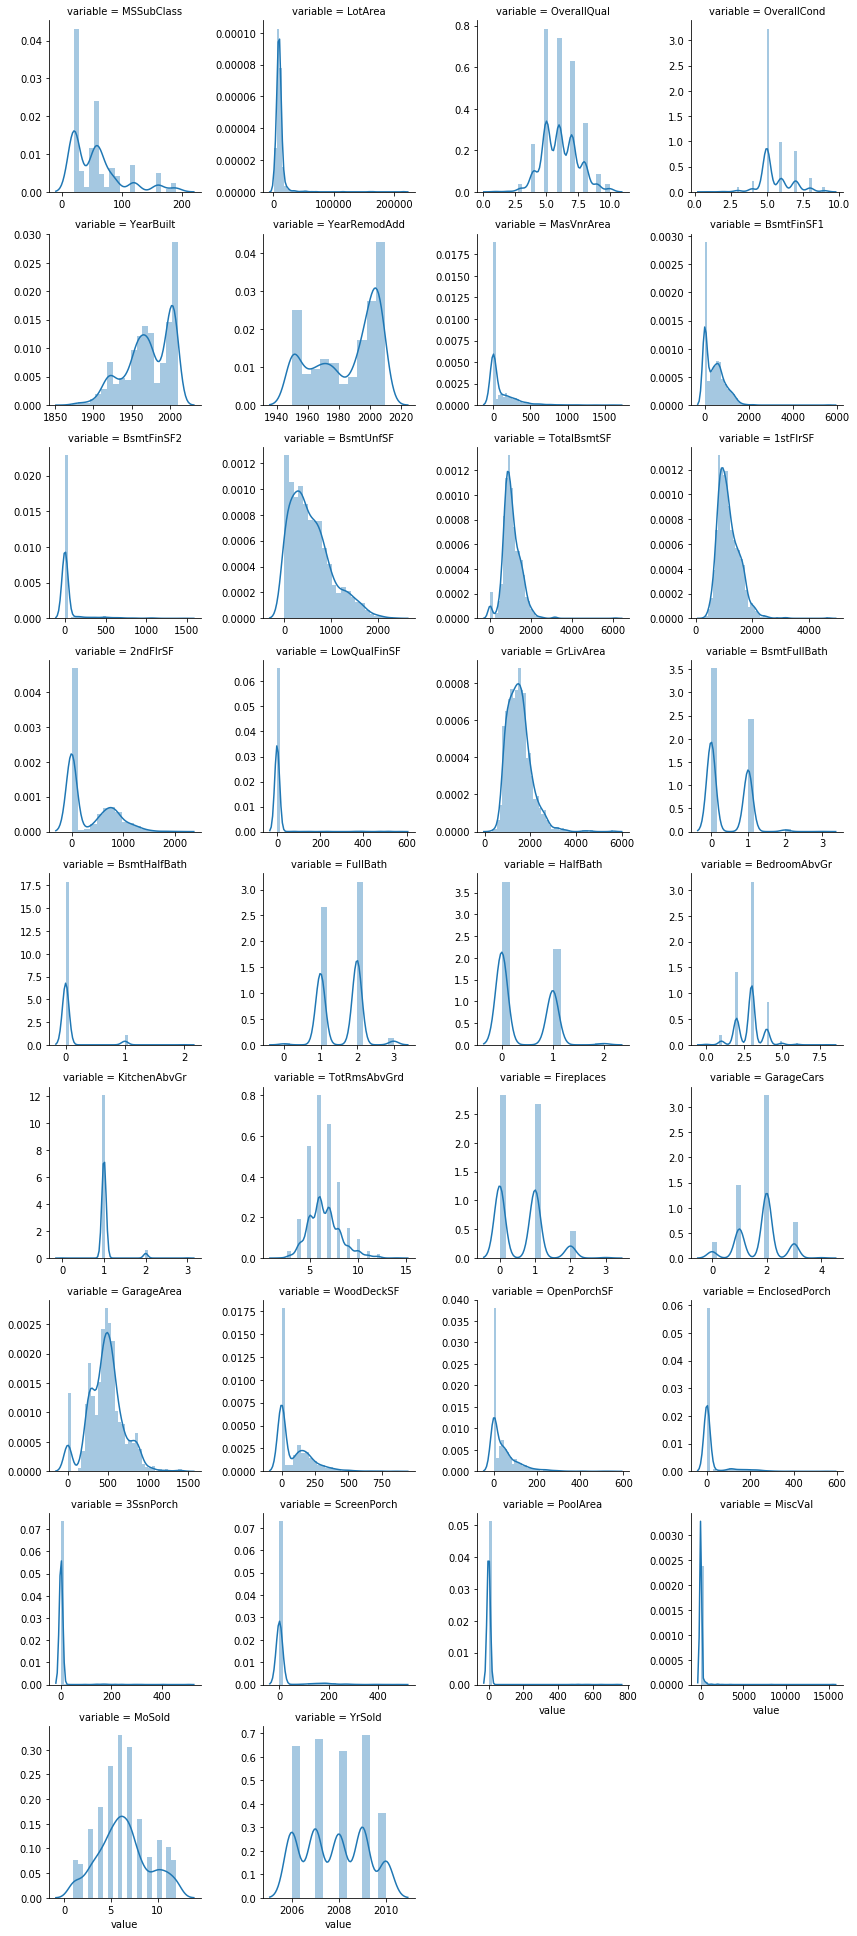

In [9]:
import seaborn as sns
num_melt = pd.melt(train, id_vars=['SalePrice'], 
                   value_vars = [f for f in numerical_features if f not in ['Id', 'SalePrice']])
g = sns.FacetGrid(data=num_melt, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.distplot, "value")

Find and plan model tuning for these types of features
* near normal features
* bi modal features
* multi-modal features

In [10]:
log_features = ['LotArea', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']

for f in log_features:
    train[f + '_Log'] = np.log1p(train[f])
    test[f + '_Log'] = np.log1p(test[f])

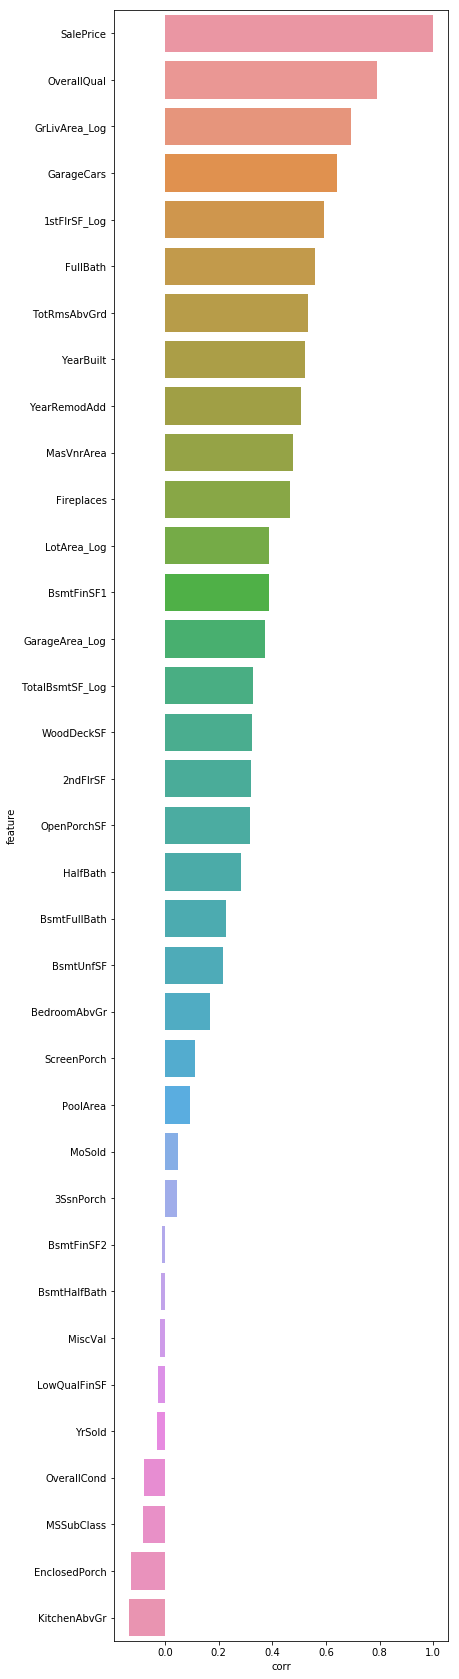

In [11]:
corr = train.drop(log_features, axis=1).corr()
corr = corr.SalePrice
from pandas import Series, DataFrame
m = DataFrame(pd.concat([DataFrame(corr.index, columns=['feature']), DataFrame(corr.values, columns=['corr'])], axis=1))
plt.figure(figsize=(6, 30))
sns.barplot(data=m.sort_values(by='corr', ascending=False), x='corr', y='feature')

In [12]:
train.drop(train[(train.LotShape == 'IR2') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.LandContour == 'Bnk') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.PavedDrive == 'P') & (train.SalePrice > 200000)].index, inplace=True)
train.drop(train[(train.MSZoning == 'RL') & (train.SalePrice > 500000)].index, inplace=True)
train.drop(train[(train.KitchenQual == 'TA') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.MSZoning == 'RM') & (train.SalePrice > 350000)].index, inplace=True)
train.drop(train[(train.LotConfig == 'Corner') & (train.SalePrice > 410000)].index, inplace=True)
train.drop(train[(train.Functional == 'Min2') & (train.SalePrice > 300000)].index, inplace=True)
train.drop(train[(train.HouseStyle == '1.5Fin') & (train.SalePrice > 400000)].index, inplace=True)
train.drop(train[(train.LandContour == 'Low') & (train.SalePrice > 350000)].index, inplace=True)

missing_idx = [977, 1278, 234, 973, 1243, 650, 936, 529, 1379]
train.loc[missing_idx, ['MasVnrType', 'MasVnrArea', 'Electrical']]

train.drop(missing_idx, inplace=True)


train.drop(train[train.LotArea > 100000].index, inplace=True)
train.drop(train[train.MasVnrArea > 1500].index, inplace=True)
train.drop(train[train.BsmtFinSF1 > 4000].index, inplace=True)
train.drop(train[train.BsmtFinSF2 > 1300].index, inplace=True)
train.drop(train[train.TotalBsmtSF > 4000].index, inplace=True)
train.drop(train[train['1stFlrSF'] > 4000].index, inplace=True)
train.drop(train[train.LowQualFinSF == 572].index, inplace=True)
train.drop(train[train.GrLivArea > 4000].index, inplace=True)
train.drop(train[train.OpenPorchSF == 523].index, inplace=True)
train.drop(train[train.MiscVal > 5000].index, inplace=True)




# assign default values for NaN
test.loc[test.MasVnrType.isnull(), 'MasVnrType'] = 'None'
test.loc[test.MasVnrArea.isnull(), 'MasVnrArea'] = 0.0
test.loc[test.MSZoning.isnull(), 'MSZoning'] = 'RL'
test.loc[test.BsmtFullBath.isnull(), 'BsmtFullBath'] = 0
test.loc[test.BsmtHalfBath.isnull(), 'BsmtHalfBath'] = 0
test.loc[test.Functional.isnull(), 'Functional'] = 'Typ'
test.loc[test.Utilities.isnull(), 'Utilities'] = 'AllPub'
test.loc[test.BsmtFinSF2.isnull(), 'BsmtFinSF2'] = 0
test.loc[test.SaleType.isnull(), 'SaleType'] = 'WD'
test.loc[test.TotalBsmtSF.isnull(), 'TotalBsmtSF'] = 0
test.loc[test.KitchenQual.isnull(), 'KitchenQual'] = 'TA'
test.loc[test.BsmtUnfSF.isnull(), 'BsmtUnfSF'] = 0
test.loc[test.Exterior1st.isnull(), 'Exterior1st'] = 'VinylSd'
test.loc[test.GarageArea_Log.isnull(), 'GarageArea_Log'] = 0.0
test.loc[test.BsmtFinSF1.isnull(), 'BsmtFinSF1'] = 0
test.loc[test.TotalBsmtSF_Log.isnull(), 'TotalBsmtSF_Log'] = 0.0
test.loc[test.GarageCars.isnull(), 'GarageCars'] = 2
test.loc[test.GarageArea.isnull(), 'GarageArea'] = 0
test.loc[test.Exterior2nd.isnull(), 'Exterior2nd'] = 'VinylSd'

In [13]:
train.isnull().sum().sort_values(ascending=False)

GarageArea_Log     0
ExterQual          0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         0
MasVnrArea         0
ExterCond          0
CentralAir         0
Foundation         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
YearRemodAdd       0
YearBuilt          0
OverallCond        0
OverallQual        0
HouseStyle         0
BldgType           0
Condition2         0
Condition1         0
Neighborhood       0
LandSlope          0
LotConfig          0
Utilities          0
LandContour        0
LotShape           0
                  ..
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
YrSold             0
1stFlrSF           0
SaleType           0
SaleCondition      0
SalePrice          0
LotArea_Log        0
TotalBsmtSF_Log    0
1stFlrSF_Log       0
WoodDeckSF         0
PavedDrive         0
GarageArea         0
GarageCars         0
Fireplaces   

## Modeling

In this section, we plan to perform:
* Feature Engineering
* Dimentionality reduction
* Building and tuning home prices prediction models


From 79 available features (input variables), we will find statistically and practically significant variables for modeling. We also will try to watch out for collinearity and spurious relationships.  

We plan to start with LinearRegression model because of the predictive nature of the problem. We will also try other supervised learning models such as Random Forest and Gradient Boosting Tree if they increase accuracy.

We will be working on two broad sets of algorithms:
1. Linear Models
2. Non Linear relationships using Random Forests

#### Linear Models
For linear models, we will try and test with the regular OLS model, and the regularized linear models of Ridge Regression, Least Absolute Shrinkage and Selection Operator (LASSO), and Elastic Net. 

For model tuning, Sklearn's grid search with CV function will be used to find the optimal hyper-parameter values.

To assess the predictive performance of regression models, we can compute the mean sum of squared errors and the related summary metric. Furthermore, we can also use graphical approach of residual plots to diagnose problems of linear regression models

We can apply regularization to our regression models to reduce the model complexity and avoid overfitting.

#### Non Linear relationships using Random Forests
For the decision tree algorithm, we will subdivide the input space into smaller regions so that it's more manageable. As Decision tree algorithm does not require any transformation of the features for nonlinear data, there will not be any feature transformation in this section. Since random forests are less sensitive to outliers in the dataset we are assuming at this point that it will not require much parameter tuning. The only parameter that will require experimenting might be number of trees. 

In [14]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV

In [15]:
numerics = list(train.select_dtypes(include=np.number).columns)
print(numerics)
categorical = list(train.select_dtypes(exclude=np.number).columns)
print(categorical)



['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'LotArea_Log', 'TotalBsmtSF_Log', '1stFlrSF_Log', 'GrLivArea_Log', 'GarageArea_Log']
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'PavedDrive', 'SaleType', 'SaleCondition']


In [18]:
X_all = train.drop([f for f in categorical_features] + log_features + ['SalePrice'], axis=1)
X_test = test.drop([f for f in categorical_features] + log_features , axis=1)


X_all_categorical = pd.get_dummies(train[categorical_features],drop_first=True)
X_test_categorical = pd.get_dummies(test[categorical_features],drop_first=True)

print("{}, {}".format(X_all_categorical.shape,X_test_categorical.shape))



std = StandardScaler()
X_all[:] = std.fit_transform(X_all)
X_test[:] = std.fit_transform(X_test)

y_all = train.SalePrice
#y_all[:] = np.log1p(y_all)


# TODO: Perform ordinal encoding of categorical_features
all_features_train = [X_all, X_all_categorical]
X_all = pd.concat(all_features_train, axis=1)
all_features_test = [X_test, X_test_categorical]
X_test = pd.concat(all_features_test, axis=1)



# split 80/20 train-dev
X_train_data, X_dev_data, y_train_data, y_dev_data = train_test_split(X_all,
                                                    y_all,
                                                    test_size=0.3,
                                                    random_state=1)
features = list(X_train_data)

y_train_data_log = np.log(y_train_data)
y_dev_data_log = np.log(y_dev_data)
#y_all.shape, X_all.shape, X_test.shape
#print(y_dev_data)
X_train_data.shape, X_dev_data.shape

(1418, 160), (1459, 147)


((992, 194), (426, 194))

In [19]:
from collections import defaultdict
from sklearn.metrics import mean_squared_error
import time
res = defaultdict(dict)
def benchmark(model, name=None):
    if not name:
        name = model.__class__.__name__
    t0 = time.clock()
    model.fit(X_train_data, y_train_data_log)
    res[name]['train_time'] = time.clock() - t0
    t0 = time.clock()
    pred = model.predict(X_dev_data)
    res[name]['test_time'] = time.clock() - t0
    res[name]['rmse'] = np.sqrt(mean_squared_error(y_dev_data_log, pred))
    return model

In [20]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [21]:
benchmark(LinearRegression())
benchmark(Ridge(alpha=5.2))
benchmark(ElasticNet(alpha=0.01))
est = benchmark(GradientBoostingRegressor(learning_rate=0.1, n_estimators=200))
benchmark(RandomForestRegressor(n_estimators=30, max_depth=10))
res_df = pd.DataFrame(data=res).T
res_df[['train_time', 'test_time', 'rmse']]

,train_time,test_time,rmse
LinearRegression,0.066063,0.001214,0.103277
Ridge,0.033952,0.001053,0.098338
ElasticNet,0.022591,0.001025,0.113312
GradientBoostingRegressor,0.890728,0.001890,0.117137
RandomForestRegressor,0.348191,0.003143,0.135115


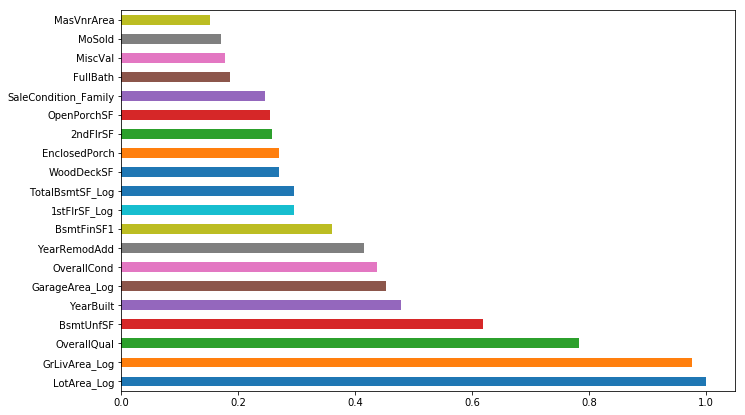

In [26]:
FIGSIZE = (11,7)
type(est.feature_importances_)
fx_imp = pd.Series(est.feature_importances_, index=features)
fx_imp /= fx_imp.max()  # normalize
#fx_imp.sort()
fx_imp.nlargest(20).plot(kind='barh', figsize=FIGSIZE)

## Partial dependence

  * Relationship between the response and a set of features, marginalizing over all other features
  * Intuitively: expected response as a function of the features we conditioned on

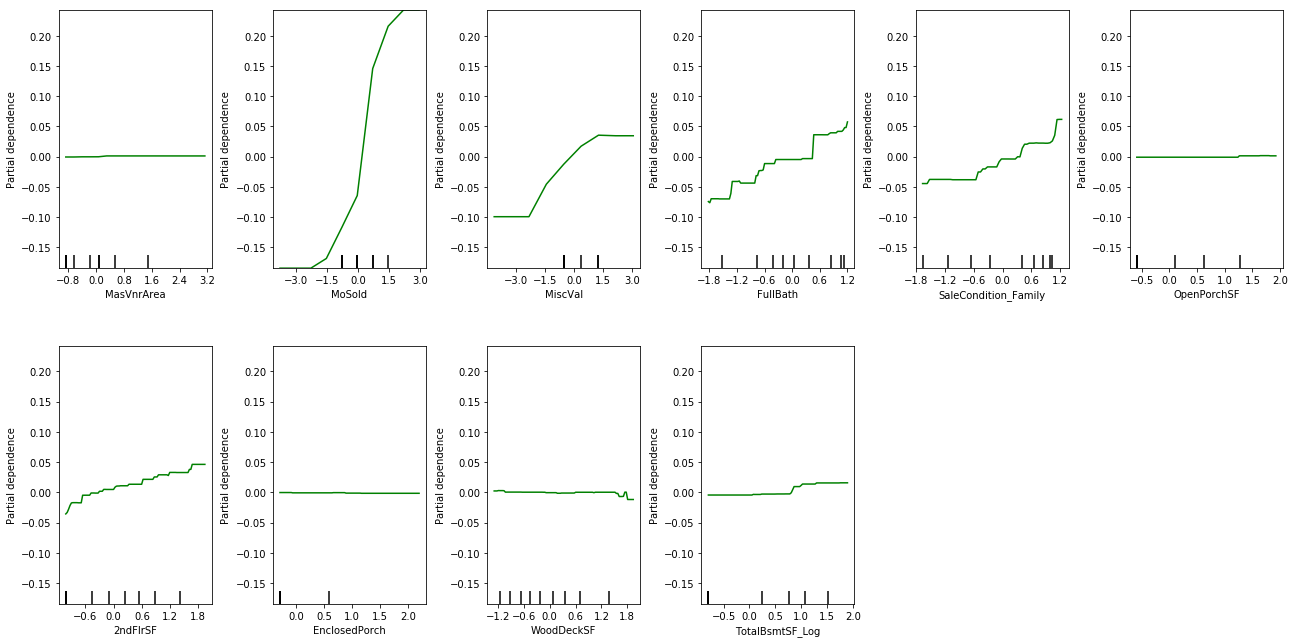

In [33]:
from sklearn.ensemble.partial_dependence import plot_partial_dependence
features = ['MasVnrArea', 'MoSold', 'MiscVal', 'FullBath', 'SaleCondition_Family','OpenPorchSF', '2ndFlrSF', 'EnclosedPorch',
           'WoodDeckSF','TotalBsmtSF_Log']
fig, axs = plot_partial_dependence(est, X_train_data, features, feature_names=features, 
                                   n_cols=6, figsize=(20,15))

## Summary & Key Results

In this section, we will present our key findings in terms of key predictor variables and their parameter values. We will also summary the modeling process and learning from it.

## References